## Q1 Matrix to Adjacency List (30 Points)

**Task:**  
Given the following 5-vertex, weighted, undirected graph:

![Weighted Graph](1e04bfd8-5003-4dfa-a499-10ef200dde46.png)

and its adjacency matrix representation:

```python
from numpy import inf

vertices = ['A', 'B', 'C', 'D', 'E']
weights = [
    [0,   1,   inf, inf, inf],
    [1,   0,   4,   inf, 3  ],
    [inf, 4,   0,   3,   2  ],
    [inf, inf, 3,   0,   inf],
    [inf, 3,   2,   inf, 0  ]]


In [ ]:
from numpy import inf

def matrix_to_list(vertex_list, weight_array):
    adjacency = {v: [] for v in vertex_list}  # start with empty adjacency list
    
    # Iterate over the adjacency matrix
    for i, v in enumerate(vertex_list):
        for j, u in enumerate(vertex_list):
            weight = weight_array[i][j]
            # Skip if no edge (inf or 0 for self-loops)
            if weight != 0 and weight != inf:
                adjacency[v].append((u, weight))
    
    return adjacency


In [ ]:
def matrix_to_list(vertex_list, weight_array):


In [ ]:

from numpy import inf

def matrix_to_list(vertex_list, weight_array):
    """
    Convert adjacency matrix to adjacency list.
    vertex_list : list of vertex labels
    weight_array : 2D list (matrix) of weights
    Returns: dict {vertex: [(neighbor, weight), ...]}
    """
    adjacency = {v: [] for v in vertex_list}  # start with empty adjacency list
    
    # Iterate over the adjacency matrix
    for i, v in enumerate(vertex_list):
        for j, u in enumerate(vertex_list):
            weight = weight_array[i][j]
            # Skip self-loops and missing edges
            if weight != 0 and weight != inf:
                adjacency[v].append((u, weight))
    
    return adjacency


# Test
vertices = ['A', 'B', 'C', 'D', 'E']
weights = [
    [0,   1,   inf, inf, inf],
    [1,   0,   4,   inf, 3  ],
    [inf, 4,   0,   3,   2  ],
    [inf, inf, 3,   0,   inf],
    [inf, 3,   2,   inf, 0  ]]

adj_list = matrix_to_list(vertices, weights)
print(adj_list)


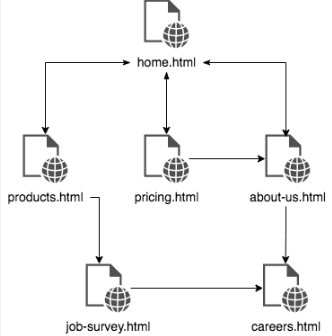

## Q3 Depth First Search (30 Points)

**Task:**  
Given a directed graph of a website:

![Website Flow](58c5dbd7-fb22-4fbe-b85b-24f1e80a63c3.png)

Implement a class `WebMap` that calculates any acyclic path between a starting page and a destination page using a **Depth First Search (DFS)**.  

- The search must return a list of the pages traversed, **or return False if no directed path exists**.  
- The answer must not rely on external graph searching libraries.

---

### Requirements:
Implement the following method:

```python
def depth_first_search (self, start, destination):
    '''
    Return a path as a list of pages between the start and 
    destination. If no path exists, return False.
    '''


Example:</br>
web_map.depth_first_search("home.html", "careers.html")</br>


could return any valid path, such as:</br>

['home.html', 'products.html', 'job-survey.html', 'careers.html']</br>


Whereas:</br>

web_map.depth_first_search("careers.html", "home.html")</br>


would return False.</br>

You must demonstrate that you have tested your implementation.</br>
Your implementation must apply the DFS algorithm explicitly.</br>

Save the notebook as b4-question-3.ipynb and submit.</br>

In [ ]:


class WebMap:
    def __init__(self, graph):
        self.graph = graph

    def depth_first_search(self, start, destination):
        """
        Perform DFS to find any acyclic path from start to destination.
        Return the path as a list of nodes, or False if no path exists.
        """
        stack = [(start, [start])]   # (current_node, path_so_far)
        visited = set()

        while stack:
            curr, path = stack.pop()
            
            if curr == destination:
                return path   # Found a valid path

            if curr not in visited:
                visited.add(curr)
                for neighbor in self.graph.get(curr, []):
                    if neighbor not in visited:
                        stack.append((neighbor, path + [neighbor]))

        return False  # No path found


In [ ]:
graph = {
    "home.html": ["pricing.html", "about-us.html", "products.html"],
    "products.html": ["home.html", "job-survey.html"],
    "job-survey.html": ["careers.html"],
    "pricing.html": ["home.html", "about-us.html"],
    "about-us.html": ["careers.html"],
    "careers.html": []  # dead end
}

# Create WebMap instance
web_map = WebMap(graph)

# Test: valid path
print("Path from home.html to careers.html:")
print(web_map.depth_first_search("home.html", "careers.html"))
# Expected: ['home.html', 'products.html', 'job-survey.html', 'careers.html']
# OR ['home.html', 'about-us.html', 'careers.html']

# Test: no path (reverse direction)
print("Path from careers.html to home.html:")
print(web_map.depth_first_search("careers.html", "home.html"))
# Expected: False


## Q4 Binary Search Tree (30 Points)

**Task**:  
Given a text file (such as `ecila.txt`), write a class `WordSearchTree` that reads the file supplied as a parameter to the constructor and creates a binary search tree (BST).

- The file contains duplicate words (e.g., `she`).  
- The vertices of the BST must store both:
  - the word, and  
  - the number of occurrences.  

You must not store the same word in multiple vertices unless the case of the word differs. The answer **must implement and use a binary search tree**.

---

### Requirements:
- Implement the following methods:

```python
class WordSearchTree:
         
    def __init__(self, filename):
        '''
        Initialise the WordSearchTree by reading a file of text
        and inserting each word into the tree. Where a word already
        exists, update the count of the word's occurrences in that
        vertex.
        '''

    def count(self, word):
        '''
        Return the number of times the word 'word' appears in the
        tree or False if it is not found.
        '''


In [ ]:


class TreeNode:
    """A node in the WordSearchTree"""
    def __init__(self, word):
        self.word = word
        self.count = 1
        self.left = None
        self.right = None


class WordSearchTree:
    def __init__(self, filename):
        """
        Initialise the WordSearchTree by reading a file of text
        and inserting each word into the tree. 
        """
        self.root = None
        with open(filename, "r") as file:
            text = file.read()
        words = text.split()
        for word in words:
            self.insert(word)

    def insert(self, word):
        """Insert a word into the BST or increase its count if it already exists"""
        if self.root is None:
            self.root = TreeNode(word)
        else:
            self._insert(self.root, word)

    def _insert(self, node, word):
        if word == node.word:
            node.count += 1
        elif word < node.word:
            if node.left is None:
                node.left = TreeNode(word)
            else:
                self._insert(node.left, word)
        else:
            if node.right is None:
                node.right = TreeNode(word)
            else:
                self._insert(node.right, word)

    def count(self, word):
        """Return number of times word appears, or False if not found"""
        node = self._search(self.root, word)
        if node:
            return node.count
        return False

    def _search(self, node, word):
        if node is None:
            return None
        if word == node.word:
            return node
        elif word < node.word:
            return self._search(node.left, word)
        else:
            return self._search(node.right, word)
